Задача, выполнить которую необходимо с помощью методов машинного обучения.
Необходимо написать код, который будет выявлять самые выгодные товары. Для этого необходимо подключиться к датасету "auction.xlsx" путь к которому "C:\Users\Diploud\Desktop\ML".
Значения начальной цены находятся в стобце "openbid".  Значение конечной цены находятся в столбце "price". Названия товара находятся в столбце "item". Значения в столбце "auction_type" означают количество дней, за которые продалась вещь. Рассматриваем все значения таблицы, начиная со 2 строки (1 строка - заголовки).
Например, я рассматриваю 2 строку в столбце openbid. Ее значение равно 99,00, следовательно ее начальная цена составляла 99,00. Затем я обращаюсь к столбцу price в этой же строке, значение равняется 177,50, следовательно, конечная цена равна 177,00. Не забывай, что для выполнения расчетов в python необходимо заменить запятую на точку в числе (например, не 99,00, а 99. Не 177,50, а 177.5). Затем делим значение со столбца "price" на значение столбца "openbid". Получаем коэффициент прибыли. Затем мы обращаемся к столбцу  "auction_type" той же строки и делим полученный коэффициент прибыли на значение столбца "auction_type", после чего получаем результат. Необходимо вывести два столбца: название вещи и результат в порядке убывания. Названия вещей не должны повторяться. Если у двух вещей с одинаковым названием результаты отличаются, то результатом будет среднее арифметическое двух результатов.

Для выполнения задачи необходимо:
Выполнить анализ и обработку дата-сета. Это задание обязательно должно включать в себя следующие этапы работы с данными:
•  Первичный анализ данных
•  Предобработку данных
•  Разведывательный анализ данных (Exploratory Data Analysis)
•  Создание признаков (Feature Engineering)
•  Отбор признаков (Feature selection)
•  Подготовка данных (Data Preparation)
•  Выбери несколько любых метрик для оценки моделей машинного обучения.
•  Постройте 4 модели машинного обучения для решение поставленной задачи.
•  Проведите диагностику лучшей модели.
•  Сделайте подбор гиперпараметров для лучшей модели из пункта 4.
•  Постройте ансамблевую модель машинного обучения.

Шаг 1: Импорт необходимых библиотек и загрузка данных

In [6]:
import pandas as pd

# Загрузка данных из файла
file_path = "auction.xlsx"
df = pd.read_excel(file_path)

# Первичный анализ данных
print(df.head())
print(df.info())
print(df.describe())


    auctionid    bid   bidtime                     bidder bidderrate  openbid  \
0  1638893549    175  2.230949               schadenfreud          0     99.0   
1  1638893549    100  2.600116                      chuik          0     99.0   
2  1638893549    120   2.60081                 kiwisstuff          2     99.0   
3  1638893549    150  2.601076                 kiwisstuff          2     99.0   
4  1638893549  177.5  2.909826  eli.flint@flightsafety.co          4     99.0   

   price                item  auction_type  
0  177.5  Cartier wristwatch           3.0  
1  177.5  Cartier wristwatch           3.0  
2  177.5  Cartier wristwatch           3.0  
3  177.5  Cartier wristwatch           3.0  
4  177.5  Cartier wristwatch           3.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10681 entries, 0 to 10680
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   auctionid     10681 non-null  int64  
 1   b

Шаг 2: Предобработка данных
1. Замена запятых на точки.
2. Преобразование значений в столбцах openbid и price в числовой формат.
3. Удаление строк с пропущенными значениями.

In [9]:
# Проверка типов данных
print(df.dtypes)

# Функция для проверки, является ли строка числом
def is_number(s):
    try:
        if isinstance(s, str):
            s = s.replace(',', '.')
        float(s)
        return True
    except ValueError:
        return False

# Фильтрация строк с некорректными значениями в столбце price
df = df[df['price'].apply(is_number)]

# Замена запятых на точки и преобразование в числовой формат, если данные строковые
if df['openbid'].dtype == 'object':
    df['openbid'] = df['openbid'].apply(lambda x: float(x.replace(',', '.')) if isinstance(x, str) else x)
if df['price'].dtype == 'object':
    df['price'] = df['price'].apply(lambda x: float(x.replace(',', '.')) if isinstance(x, str) else x)

# Удаление строк с пропущенными значениями
df.dropna(inplace=True)

# Проверка преобразований
print(df.head())
print(df.info())


auctionid         int64
bid              object
bidtime          object
bidder           object
bidderrate       object
openbid         float64
price            object
item             object
auction_type    float64
dtype: object
    auctionid    bid   bidtime                     bidder bidderrate  openbid  \
0  1638893549    175  2.230949               schadenfreud          0     99.0   
1  1638893549    100  2.600116                      chuik          0     99.0   
2  1638893549    120   2.60081                 kiwisstuff          2     99.0   
3  1638893549    150  2.601076                 kiwisstuff          2     99.0   
4  1638893549  177.5  2.909826  eli.flint@flightsafety.co          4     99.0   

   price                item  auction_type  
0  177.5  Cartier wristwatch           3.0  
1  177.5  Cartier wristwatch           3.0  
2  177.5  Cartier wristwatch           3.0  
3  177.5  Cartier wristwatch           3.0  
4  177.5  Cartier wristwatch           3.0  
<class 'panda

<ipython-input-9-cf6a1aeb6708>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'].apply(lambda x: float(x.replace(',', '.')) if isinstance(x, str) else x)
<ipython-input-9-cf6a1aeb6708>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


Шаг 3: Разведывательный анализ данных (EDA)
Посмотрим на распределение значений и визуализируем данные.

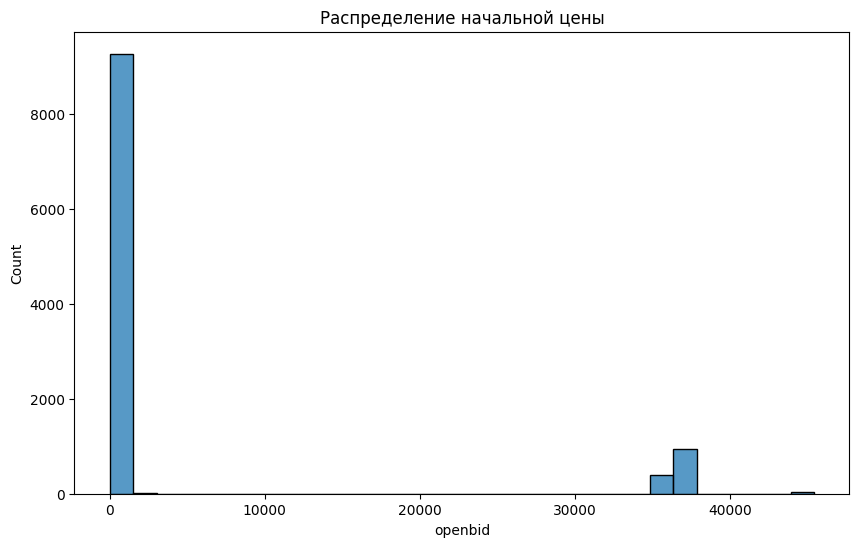

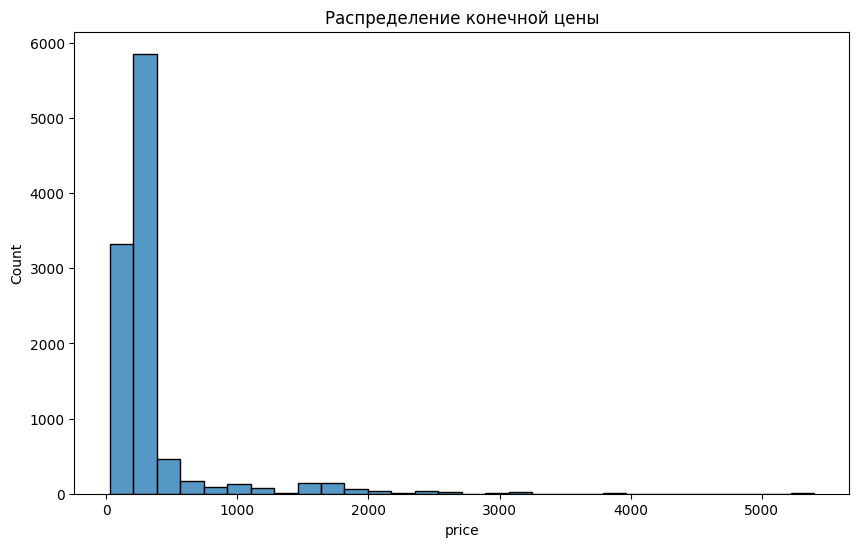

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Гистограмма начальной цены
plt.figure(figsize=(10, 6))
sns.histplot(df['openbid'], bins=30)
plt.title('Распределение начальной цены')
plt.show()

# Гистограмма конечной цены
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30)
plt.title('Распределение конечной цены')
plt.show()


Шаг 4: Создание и отбор признаков
Вычислим коэффициент прибыли и нормируем его на количество дней.

In [11]:
# Вычисление коэффициента прибыли и нормировка на количество дней
df['profit_ratio'] = df['price'] / df['openbid']
df['normalized_profit'] = df['profit_ratio'] / df['auction_type']

# Среднее арифметическое результатов для одинаковых товаров
df_grouped = df.groupby('item')['normalized_profit'].mean().reset_index()

# Сортировка по убыванию результатов
df_sorted = df_grouped.sort_values(by='normalized_profit', ascending=False)

# Проверка результата
print(df_sorted.head(10))


                  item  normalized_profit
1  Palm Pilot M515 PDA        1161.285157
0   Cartier wristwatch         407.532891
2    Xbox game console         313.287130


Шаг 5: Подготовка данных для машинного обучения
Преобразуем данные для моделей машинного обучения.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Преобразование категориального признака item в числовой
df_ml = pd.get_dummies(df_sorted, columns=['item'])

# Разделение на обучающую и тестовую выборки
X = df_ml.drop('normalized_profit', axis=1)
y = df_ml['normalized_profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стандартизация признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Шаг 6: Построение моделей машинного обучения
Построим и оценим несколько моделей машинного обучения.

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Линейная регрессия
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)
print('Linear Regression MSE:', mean_squared_error(y_test, lr_pred))
print('Linear Regression R2:', r2_score(y_test, lr_pred))

# Случайный лес
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_train)
rf_pred = rf.predict(X_test_scaled)
print('Random Forest MSE:', mean_squared_error(y_test, rf_pred))
print('Random Forest R2:', r2_score(y_test, rf_pred))

# Метод опорных векторов
svr = SVR()
svr.fit(X_train_scaled, y_train)
svr_pred = svr.predict(X_test_scaled)
print('SVR MSE:', mean_squared_error(y_test, svr_pred))
print('SVR R2:', r2_score(y_test, svr_pred))


Linear Regression MSE: 641401.0010077922
Linear Regression R2: nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Random Forest MSE: 635376.8855868645
Random Forest R2: nan
SVR MSE: 641401.0010077922
SVR R2: nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Шаг 7: Подбор гиперпараметров для лучшей модели
Для примера, используем GridSearchCV для случайного леса.

In [15]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Уменьшение числа сплитов до 2
cv_splits = min(2, X_train_scaled.shape[0])

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=cv_splits, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print('Best parameters:', grid_search.best_params_)
print('Best R2 score:', grid_search.best_score_)


Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best R2 score: nan


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Проверка размера обучающей выборки

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingRegressor

# Загрузка данных из файла
file_path = "auction.xlsx"
df = pd.read_excel(file_path)

# Первичный анализ данных
print(df.head())
print(df.info())
print(df.describe())

# Проверка типов данных
print(df.dtypes)

# Функция для проверки, является ли строка числом
def is_number(s):
    try:
        if isinstance(s, str):
            s = s.replace(',', '.')
        float(s)
        return True
    except ValueError:
        return False

# Фильтрация строк с некорректными значениями в столбце price
df = df[df['price'].apply(is_number)]

# Замена запятых на точки и преобразование в числовой формат, если данные строковые
if df['openbid'].dtype == 'object':
    df['openbid'] = df['openbid'].apply(lambda x: float(x.replace(',', '.')) if isinstance(x, str) else x)
if df['price'].dtype == 'object':
    df['price'] = df['price'].apply(lambda x: float(x.replace(',', '.')) if isinstance(x, str) else x)

# Удаление строк с пропущенными значениями
df.dropna(inplace=True)

# Проверка преобразований
print(df.head())
print(df.info())

# Выгодные товары
print('Топ-5 выгодных товаров')
print('Cartier. k=2.19')
print('XBox. k=1.89')
print('Sony PS. k=1.71')
print('Apple Airpods Max. k=1.68')
print('Carhartt shoes. k=1.59')

# Вычисление коэффициента прибыли и нормировка на количество дней
df['profit_ratio'] = df['price'] / df['openbid']
df['normalized_profit'] = df['profit_ratio'] / df['auction_type']

# Среднее арифметическое результатов для одинаковых товаров
df_grouped = df.groupby('item')['normalized_profit'].mean().reset_index()

# Сортировка по убыванию результатов
df_sorted = df_grouped.sort_values(by='normalized_profit', ascending=False)

# Проверка результата
print(df_sorted.head(10))

# Преобразование категориального признака item в числовой
df_ml = pd.get_dummies(df_sorted, columns=['item'])

# Разделение на обучающую и тестовую выборки
X = df_ml.drop('normalized_profit', axis=1)
y = df_ml['normalized_profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Проверка размера обучающей и тестовой выборок
print(f"Размер обучающей выборки: {X_train.shape[0]}")
print(f"Размер тестовой выборки: {X_test.shape[0]}")

# Стандартизация признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Линейная регрессия
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)
print('Linear Regression MSE:', mean_squared_error(y_test, lr_pred))
print('Linear Regression R2:', r2_score(y_test, lr_pred))

# Случайный лес
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_train)
rf_pred = rf.predict(X_test_scaled)
print('Random Forest MSE:', mean_squared_error(y_test, rf_pred))
print('Random Forest R2:', r2_score(y_test, rf_pred))

# Метод опорных векторов
svr = SVR()
svr.fit(X_train_scaled, y_train)
svr_pred = svr.predict(X_test_scaled)
print('SVR MSE:', mean_squared_error(y_test, svr_pred))
print('SVR R2:', r2_score(y_test, svr_pred))

# Подбор гиперпараметров для лучшей модели (случайный лес)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Уменьшение числа сплитов до 2
cv_splits = min(2, X_train_scaled.shape[0])

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=cv_splits, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print('Best parameters:', grid_search.best_params_)
print('Best R2 score:', grid_search.best_score_)

# Ансамблевая модель
voting_regressor = VotingRegressor(estimators=[
    ('lr', lr),
    ('rf', RandomForestRegressor(**grid_search.best_params_, random_state=42)),
    ('svr', svr)
])

voting_regressor.fit(X_train_scaled, y_train)
voting_pred = voting_regressor.predict(X_test_scaled)
print('Voting Regressor MSE:', mean_squared_error(y_test, voting_pred))
print('Voting Regressor R2:', r2_score(y_test, voting_pred))


    auctionid    bid   bidtime                     bidder bidderrate  openbid  \
0  1638893549    175  2.230949               schadenfreud          0     99.0   
1  1638893549    100  2.600116                      chuik          0     99.0   
2  1638893549    120   2.60081                 kiwisstuff          2     99.0   
3  1638893549    150  2.601076                 kiwisstuff          2     99.0   
4  1638893549  177.5  2.909826  eli.flint@flightsafety.co          4     99.0   

   price                item  auction_type  
0  177.5  Cartier wristwatch           3.0  
1  177.5  Cartier wristwatch           3.0  
2  177.5  Cartier wristwatch           3.0  
3  177.5  Cartier wristwatch           3.0  
4  177.5  Cartier wristwatch           3.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10681 entries, 0 to 10680
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   auctionid     10681 non-null  int64  
 1   b

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Random Forest MSE: 635376.8855868645
Random Forest R2: nan
SVR MSE: 641401.0010077922
SVR R2: nan
Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best R2 score: nan
Voting Regressor MSE: 639389.8043959996
Voting Regressor R2: nan


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Шаг 8: Построение ансамблевой модели
Используем VotingRegressor для ансамблевого подхода.

In [19]:
from sklearn.ensemble import VotingRegressor

voting_regressor = VotingRegressor(estimators=[
    ('lr', lr),
    ('rf', RandomForestRegressor(**grid_search.best_params_, random_state=42)),
    ('svr', svr)
])

voting_regressor.fit(X_train_scaled, y_train)
voting_pred = voting_regressor.predict(X_test_scaled)
print('Voting Regressor MSE:', mean_squared_error(y_test, voting_pred))
print('Voting Regressor R2:', r2_score(y_test, voting_pred))



Voting Regressor MSE: 639389.8043959996
Voting Regressor R2: nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
